**Description:** This file contains test code for the Euclidean-based expected improvement (EEI) function when used to solve two-objective optimization problems. We use four test problems: Fonseca, Kursawe, Omni, and ZDT3.
- Formulation of the EEI requires an specific sorting of the Pareto front. Check the [publication](https://asmedigitalcollection.asme.org/mechanicaldesign/article-abstract/145/10/101705/1164097/Multi-Objective-Bayesian-Optimization-Supported-by) for more details.
- If you want to test a GP model different from the one used in the paper, use the src/vanilla_GP_model.py file to modify the model (kernel and mean function).
- The proposed and benhcmark approaches make use of tensorflow-probability version 0.23.0. A different version migth lead to execution errors. Check the requirements.txt file for the necessary libraries to test the repo.

In [ ]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp # Be sure that you have installed this version: tensorflow-probability==0.23.0
import gpflow as gpf
import scipy.io
from sklearn.preprocessing import MinMaxScaler
from pymoo.indicators.hv import HV
import warnings
warnings.filterwarnings("ignore")

# Import in-house functions for multiobjective optimization 
import src.test_functions as test_function
from src.vanilla_GP_model import build_GPR_model_EPDC as build_GPR_model
from src.vanilla_GP_model import train_gp_model_EPDC as train_gp_model
from src.Euclidean_EI import Penalized_EEI as EEI
from src.find_pareto import Pareto_front
from src.optimization import find_new_design_EEI

d:\Github_projects\jmd-epdc\.venv\Lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.decorator.check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(
d:\Github_projects\jmd-epdc\.venv\Lib\site-packages\gpflow\experimental\utils.py:42: UserWarning: You're calling gpflow.experimental.check_shapes.inheritance.inherit_check_shapes which is considered *experimental*. Expect: breaking changes, poor documentation, and bugs.
  warn(


**Fonseca test problem:** Problem with a non-convex Pareto front and two design variables.

Optimization settings

In [2]:
test_index = 0 # select a test index from 0 to 4 (to retrive the initial sampling plan located in the data directory).
total_iter = 100 # Total number of iterations
n_dimensions = 2 # Number of dimensions of the optimization problem
X_bounds = np.concatenate((-4*np.ones((1,n_dimensions)),4*np.ones((1,n_dimensions))),0) # Box constraints of the optimization problem

num_steps_optimizer = 400  # Number of iterations of SGD-based optimizer (300 - 400)
learning_rate = 0.25  # Learning rate optimizer

n_samples_opt = np.min((25 * n_dimensions, 500)) # Number of points for multi-point optimization of the EPDC
eff_length = ((0.05 ** 2) * n_dimensions) ** 0.5  # Effective lenght for penalization of similar designs
ref_point = np.array([1., 1.]) # Reference point for calculation of dominated hypervolume

Optimization loop

Iteration: 1
New design: [-0.57127364  0.71561104]
Initial HV: 0.012290774606169553
Current HV: 0.012290774606169553
Acquisition function: 0.03827082
EEI: 0.039105006
PI: 0.23142049
Similar design penalization: 0.9786681


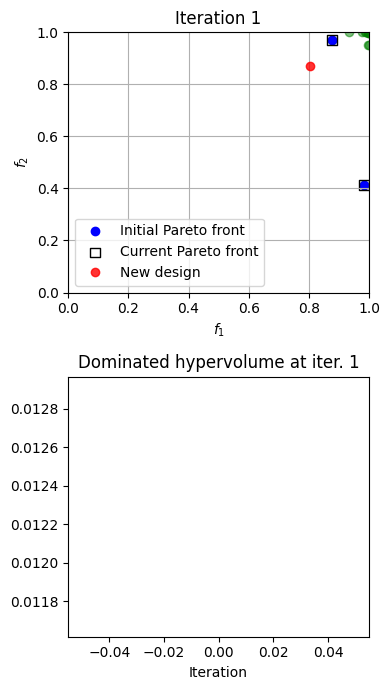

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
New design: [-0.02116773  0.41558132]
Initial HV: 0.012290774606169553
Current HV: 0.1681680178832135
Acquisition function: 0.09055621
EEI: 0.119205885
PI: 0.76477516
Similar design penalization: 0.7596623


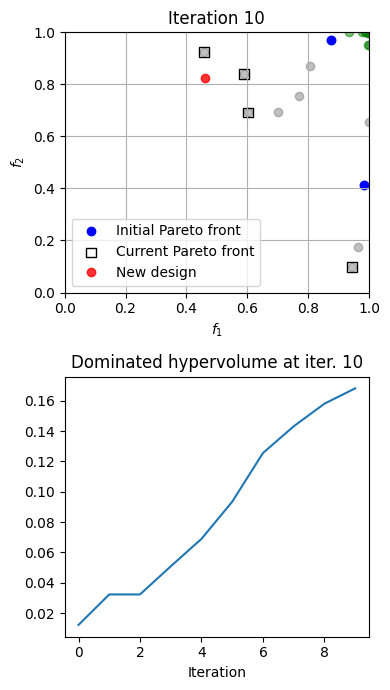

Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
New design: [1.07747746 0.27714662]
Initial HV: 0.012290774606169553
Current HV: 0.22187124744895437
Acquisition function: 0.00935826
EEI: 0.009441446
PI: 0.0992201
Similar design penalization: 0.9911893


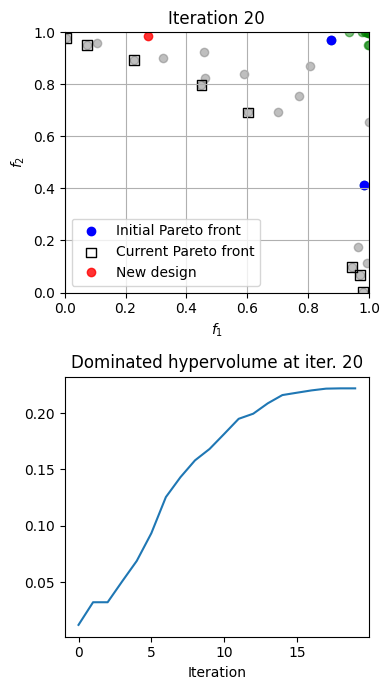

Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
New design: [-0.21756715 -3.9385774 ]
Initial HV: 0.012290774606169553
Current HV: 0.22891554575696801
Acquisition function: 0.00019241958
EEI: 0.00019241958
PI: 0.0015919871
Similar design penalization: 1.0


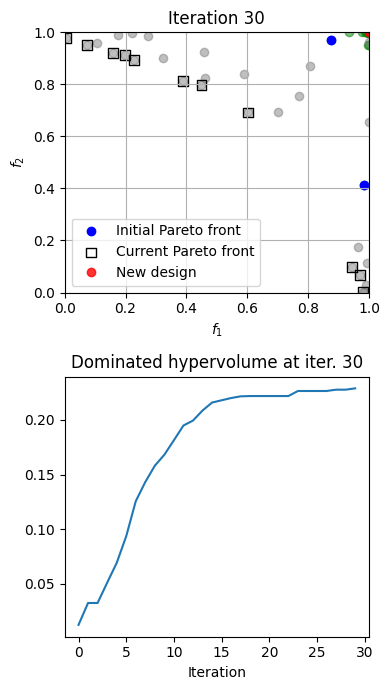

Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
New design: [0.46919899 0.4290164 ]
Initial HV: 0.012290774606169553
Current HV: 0.23249544354614787
Acquisition function: 0.0036605874
EEI: 0.008006179
PI: 0.23834004
Similar design penalization: 0.4572203


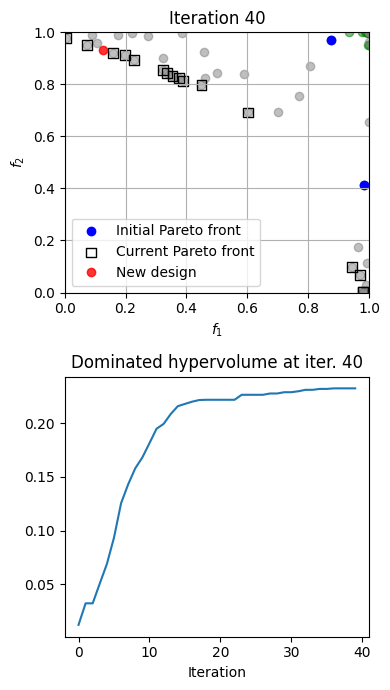

Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
New design: [0.74709049 0.68853252]
Initial HV: 0.012290774606169553
Current HV: 0.23471217682632028
Acquisition function: 0.002086418
EEI: 0.0049946993
PI: 0.51988643
Similar design penalization: 0.41772643


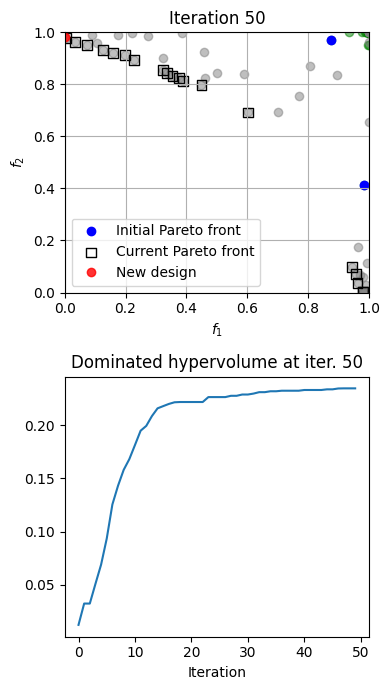

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
New design: [2.60576227 3.58855452]
Initial HV: 0.012290774606169553
Current HV: 0.23555692246993137
Acquisition function: 4.27553e-07
EEI: 4.27553e-07
PI: 7.2514026e-06
Similar design penalization: 1.0


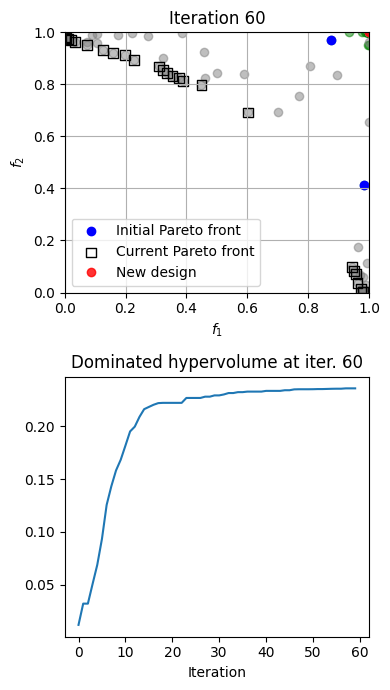

Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
New design: [-1.55455585 -1.18218932]
Initial HV: 0.012290774606169553
Current HV: 0.26154417002469277
Acquisition function: 1.380396e-06
EEI: 1.3857201e-06
PI: 2.5358655e-05
Similar design penalization: 0.9961579


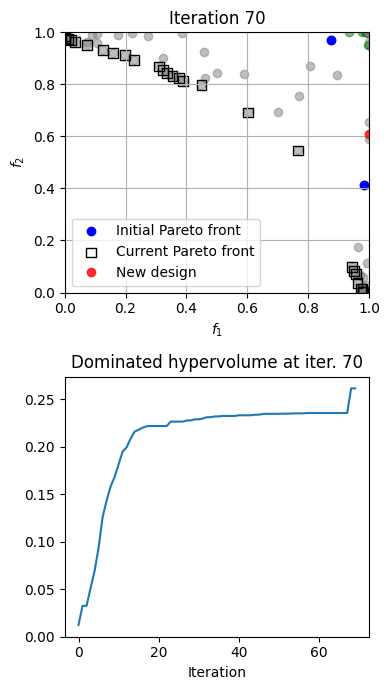

Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
New design: [-0.34513287 -0.26070739]
Initial HV: 0.012290774606169553
Current HV: 0.26232805370545287
Acquisition function: 3.438611e-07
EEI: 4.2207657e-07
PI: 1.6093932e-06
Similar design penalization: 0.8146889


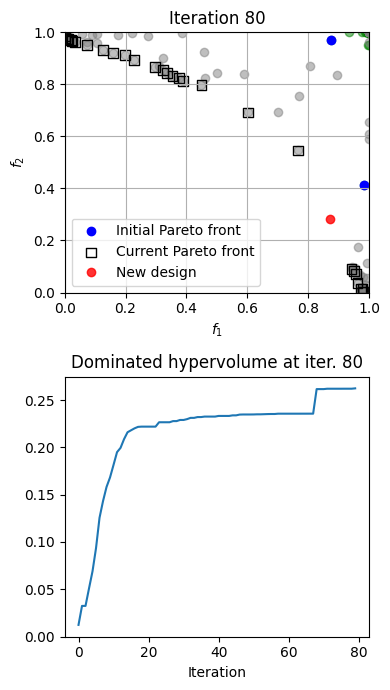

Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
New design: [-0.775024   -0.70508339]
Initial HV: 0.012290774606169553
Current HV: 0.28509854776089644
Acquisition function: 0.00035565483
EEI: 0.0021036135
PI: 0.5038566
Similar design penalization: 0.16906853


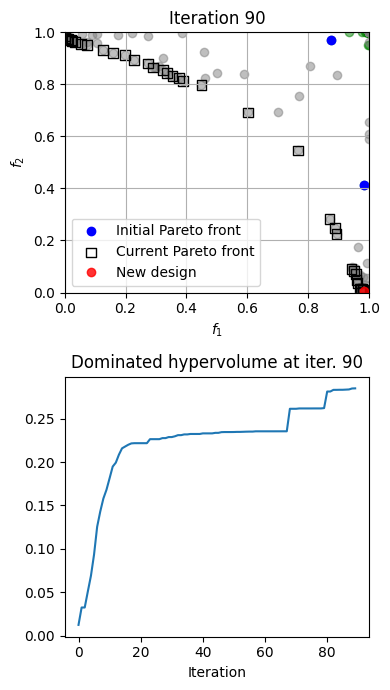

Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
New design: [-0.65814834 -0.64981793]
Initial HV: 0.012290774606169553
Current HV: 0.29346975634606365
Acquisition function: 0.00079468783
EEI: 0.0046668146
PI: 0.6446963
Similar design penalization: 0.17028485


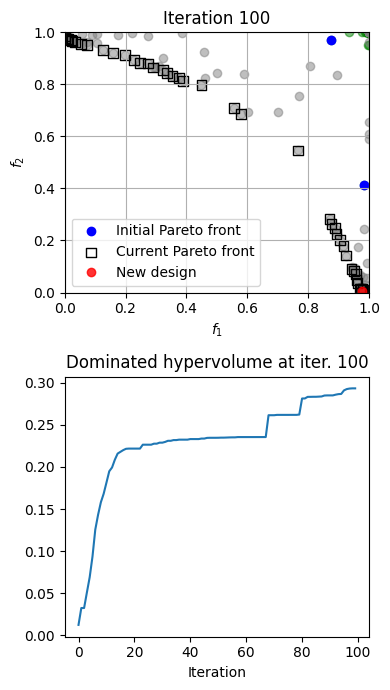

Optimization completed ...


In [3]:
# Import initial sampling plan. We are using a sampling plan located in the data directory to enable reproducibility of results.
X_train_dic = scipy.io.loadmat('data/two_objective_Fonseca_2_dv.mat')
X_train_lhs = X_train_dic.get('X_initial')

# Evaluate sampling plan
X_train = X_train_lhs[:, :, test_index]
n_init = X_train.shape[0]
F_train = test_function.Fonseca(X_train, n_dimensions)
n_objectives = F_train.shape[1]  # number of objectives

# Arrays to track behaviour of optimization approach
HV_optimization = np.zeros((total_iter, 1))
NaN_flag_1 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 1
NaN_flag_2 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 2

# Normalization of inputs outside optimization loop as we know its maximum and minimum values
scaler_X = MinMaxScaler()
scaler_X.fit(X_bounds)

# Bayesian optimization loop
for iter in range(total_iter):
    #%% ############# Find Pareto front and Pareto set
    # Pareto designs: O if dominated, 1 if not dominated
    Pareto_index = Pareto_front(F_train)
    # Pareto front
    PF = F_train[Pareto_index]
    # Pareto designs
    PD = X_train[Pareto_index, :]
    ################## Sort Pareto front for multi-objective optimization code
    ################## that uses EEI approach (needed!!)
    PF = PF[PF[:, 0].argsort(), :]
    PD = X_train[Pareto_index, :]
    PD = PD[PF[:, 0].argsort(), :]
    ##################
    # Create scaler instances
    scaler_Y = MinMaxScaler()
    scaler_Y.fit(F_train)
    # Normalize PF, PD, and training data
    PFn, PDn = scaler_Y.transform(PF), scaler_X.transform(PD)
    F_train_n, X_train_n = scaler_Y.transform(F_train), scaler_X.transform(X_train)

    # Record initial Pareto front and Pareto set
    if iter == 0:
        # Pareto designs
        PF_init = PF
        PD_init = PD
    # Transform initial design according to current transformation
    PDn_init = scaler_X.transform(PD_init)
    PFn_init = scaler_Y.transform(PF_init)

    #%% ############## GP models
    # Training data for GPR models
    f1_train, f2_train = np.hsplit(F_train_n, n_objectives)

    # Build GPR models
    m1 = build_GPR_model(X_train_n, f1_train)
    m2 = build_GPR_model(X_train_n, f2_train)

    # Train GPR model 1
    m1, NaN_flag_1 = train_gp_model(m1, X_train_n, f1_train, NaN_flag_1, iter)

    # Train GPR model 2
    m2, NaN_flag_2 = train_gp_model(m2, X_train_n, f2_train, NaN_flag_2, iter)

    # GPR models
    GPR_models = [m1, m2]
    
    #%% ############## Optimization of acquisition function to find a new design for sampling
    # Transformation of variables to enforce box constraints
    lb_X = np.float64(np.zeros(n_dimensions))
    ub_X = np.float64(np.ones(n_dimensions))
    Sigmoid_X = tfp.bijectors.Sigmoid(low=lb_X, high=ub_X)
    scaling_opt = 1
    x_new = find_new_design_EEI(GPR_models, EEI, X_train_n, PFn, eff_length, n_samples_opt, n_dimensions, learning_rate, num_steps_optimizer, Sigmoid_X, scaling_opt)

    #%% ############## Evaluate new design
    x_new_original = scaler_X.inverse_transform(x_new)
    F_new = test_function.Fonseca(x_new_original, n_dimensions)

    #%% ############## Optimization performance metrics
    ind_0 = HV(ref_point=ref_point)
    initial_HV = ind_0(PF_init)
    ind_i = HV(ref_point=ref_point)
    HV_optimization[iter, :] = ind_i(PF)
    scaling_opt = 0
    AF_i, EEI_x_i, Prob_impr_i, YP_i, min_distance_x_i, penal_dist_x_i = EEI(x_new, GPR_models, PFn, Sigmoid_X, X_train_n, eff_length, scaling_opt) # Here scaling_opt is 0 since x_new is already scaled

    print("Iteration:", iter + 1)
    
    # #%% ############## Visualization and tracing evolution of optimization
    # Plot every 10 iterations
    if ((iter + 1) % 10 == 0) or (iter == 0):        
        print("New design:", x_new_original[0])
        print("Initial HV:", initial_HV)
        print("Current HV:", ind_i(PF))
        print("Acquisition function:", -AF_i.numpy()[0, 0])
        print("EEI:", EEI_x_i.numpy()[0, 0])
        print("PI:", Prob_impr_i.numpy()[0, 0])
        print("Similar design penalization:", penal_dist_x_i.numpy()[0, 0])

        plt.figure(figsize=(4, 7))
        ax1 = plt.subplot(211)
        ax1.grid()
        plt.scatter(F_train[:n_init, 0], F_train[:n_init, 1], c='green', alpha=0.5) # 'Initial designs'
        plt.scatter(F_train[n_init:, 0], F_train[n_init:, 1], c='gray', alpha=0.5) #'Sampled designs'
        plt.scatter(PF_init[:, 0], PF_init[:, 1], c='blue', label = 'Initial Pareto front')
        plt.scatter(PF[:, 0], PF[:, 1], marker= 's', s=50, facecolors='none', edgecolors='k', label = 'Current Pareto front')
        plt.plot(F_new[0:, 0], F_new[0:, 1], 'ro', alpha=0.8, label = 'New design')
        ax1.set_xlabel('$f_1$')
        ax1.set_ylabel('$f_2$')
        ax1.set_title('Iteration ' + str(iter + 1))
        ax1.legend(loc='lower left')
        ax1.set_xlim([0, 1])
        ax1.set_ylim([0, 1])

        ax2 = plt.subplot(212)
        ax2.plot(HV_optimization[:iter+1,0])
        ax2.set_xlabel('Iteration')
        ax2.title.set_text('Dominated hypervolume at iter. ' + str(iter + 1))
        plt.tight_layout()
        plt.show()

    # %% Update training data
    F_train = np.concatenate((F_train, F_new), 0)
    X_train = np.concatenate((X_train, x_new_original), 0)
print('Optimization completed ...')

**Kursawe test problem:** Problem with a segmented Pareto front and three design variables.

Optimization settings

In [4]:
test_index = 0 # select a test index from 0 to 4 (to retrive the initial sampling plan located in the data directory).
total_iter = 100 # Total number of iterations
n_dimensions = 3 # Number of dimensions of the optimization problem
X_bounds = np.concatenate((-5*np.ones((1,n_dimensions)),5*np.ones((1,n_dimensions))),0) # Box constraints of the optimization problem

num_steps_optimizer = 400  # Number of iterations of SGD-based optimizer (300 - 400)
learning_rate = 0.25  # Learning rate optimizer

n_samples_opt = np.min((25 * n_dimensions, 500)) # Number of points for multi-point optimization of the EPDC
eff_length = ((0.05 ** 2) * n_dimensions) ** 0.5  # Effective lenght for penalization of similar designs
ref_point = np.array([-6., 15.])# Reference point for calculation of dominated hypervolume

Optimization loop

Iteration: 1
New design: [-0.55366208  0.15937525  0.20713519]
Initial HV: 137.77833276623036
Current HV: 137.77833276623036
Acquisition function: 0.39733776
EEI: 0.39733776
PI: 0.99755734
Similar design penalization: 1.0


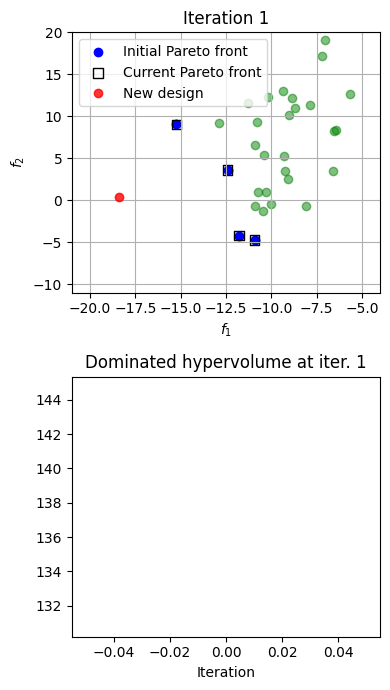

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
New design: [3.69612465 4.95338628 1.95758467]
Initial HV: 137.77833276623036
Current HV: 237.8469395168311
Acquisition function: 0.077178635
EEI: 0.11098565
PI: 0.15559006
Similar design penalization: 0.6953929


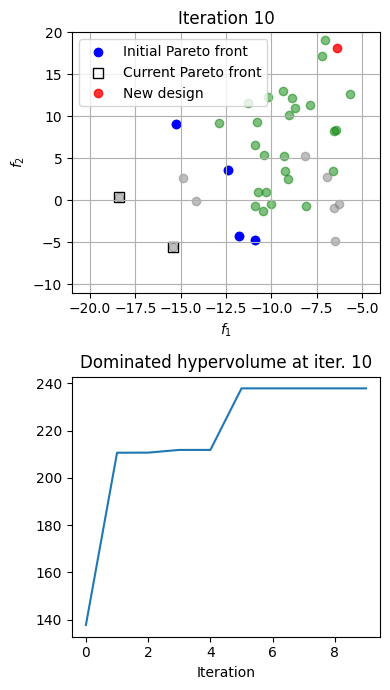

Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
New design: [-4.76640716 -3.92739159  3.9654311 ]
Initial HV: 137.77833276623036
Current HV: 247.7155533072865
Acquisition function: 0.028122533
EEI: 0.02822122
PI: 0.040662438
Similar design penalization: 0.9965031


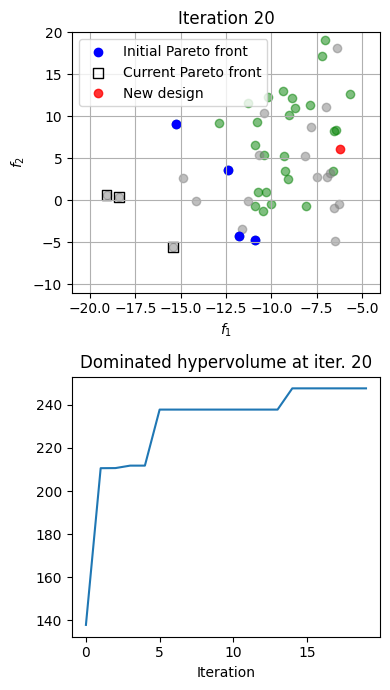

Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
New design: [ 0.12972443  0.21990307 -0.17340664]
Initial HV: 137.77833276623036
Current HV: 248.8611469401934
Acquisition function: 0.030087657
EEI: 0.043947935
PI: 0.39502352
Similar design penalization: 0.6846205


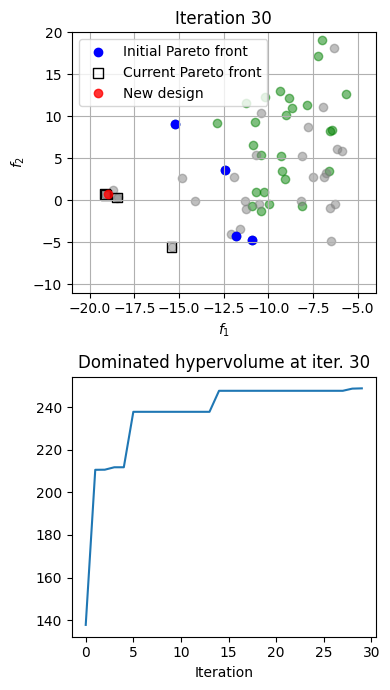

Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
New design: [0.384074   0.27034526 0.23951447]
Initial HV: 137.77833276623036
Current HV: 254.91748059296657
Acquisition function: 0.025088685
EEI: 0.036568213
PI: 0.30145988
Similar design penalization: 0.686079


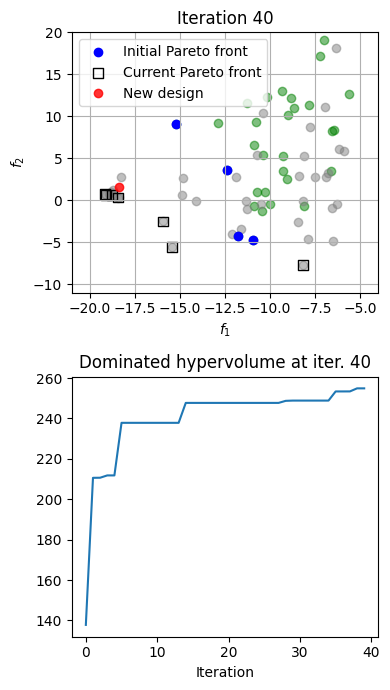

Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
New design: [-0.35511715  0.02531292 -0.41581728]
Initial HV: 137.77833276623036
Current HV: 264.0342504689372
Acquisition function: 0.01597781
EEI: 0.023717076
PI: 0.301349
Similar design penalization: 0.6736838


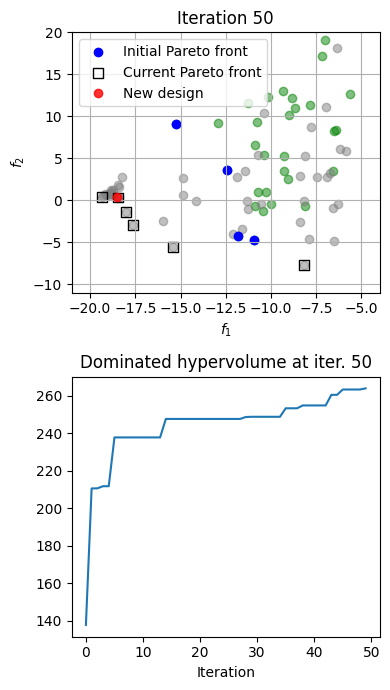

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
New design: [ 1.23221736  1.84673315 -1.2229808 ]
Initial HV: 137.77833276623036
Current HV: 264.0951751661494
Acquisition function: 0.032083113
EEI: 0.03477666
PI: 0.14635593
Similar design penalization: 0.9225473


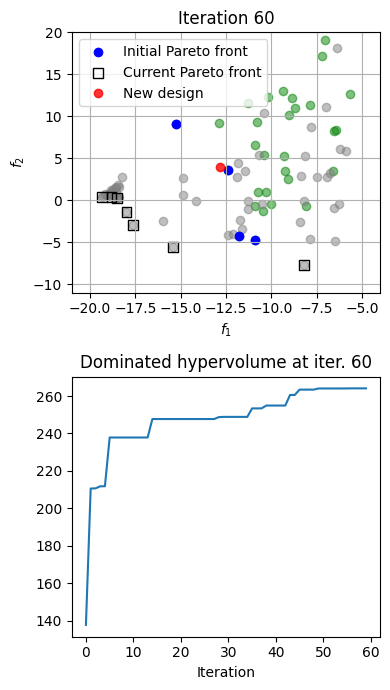

Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
New design: [ 0.17852086  0.0167907  -0.03415794]
Initial HV: 137.77833276623036
Current HV: 264.16429380868544
Acquisition function: 0.019252367
EEI: 0.037315752
PI: 0.42329645
Similar design penalization: 0.51593137


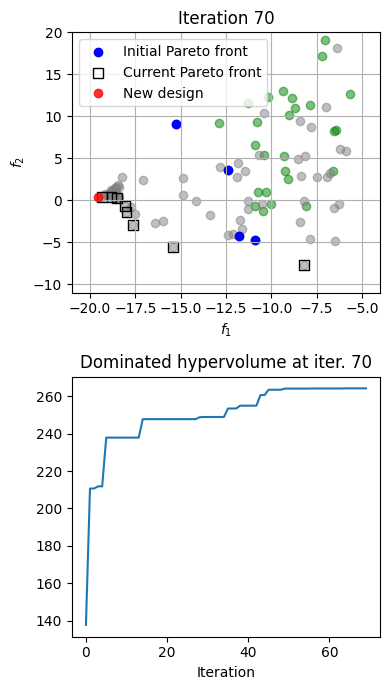

Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
New design: [ 0.54153362 -0.84123635  0.07217822]
Initial HV: 137.77833276623036
Current HV: 268.9465737951686
Acquisition function: 0.012020463
EEI: 0.013139406
PI: 0.12410105
Similar design penalization: 0.9148407


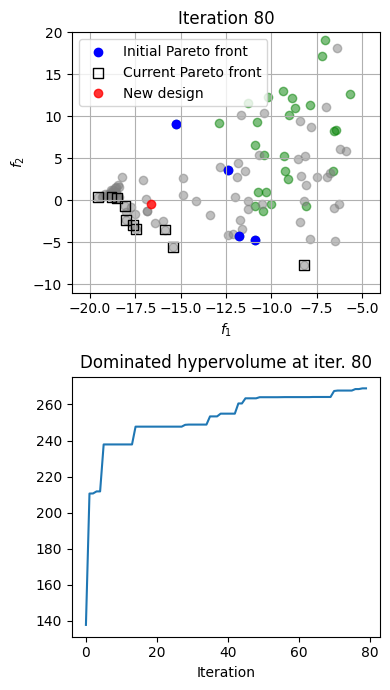

Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
New design: [3.73391037 0.44657076 1.70681032]
Initial HV: 137.77833276623036
Current HV: 269.2127315378726
Acquisition function: 0.01722032
EEI: 0.018612253
PI: 0.06810421
Similar design penalization: 0.9252142


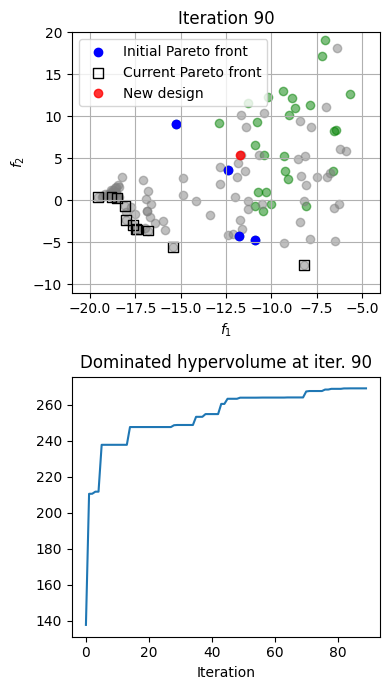

Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
New design: [-0.65103541  0.5996029   0.34218154]
Initial HV: 137.77833276623036
Current HV: 269.3621072132231
Acquisition function: 0.016628558
EEI: 0.019127876
PI: 0.18905266
Similar design penalization: 0.86933637


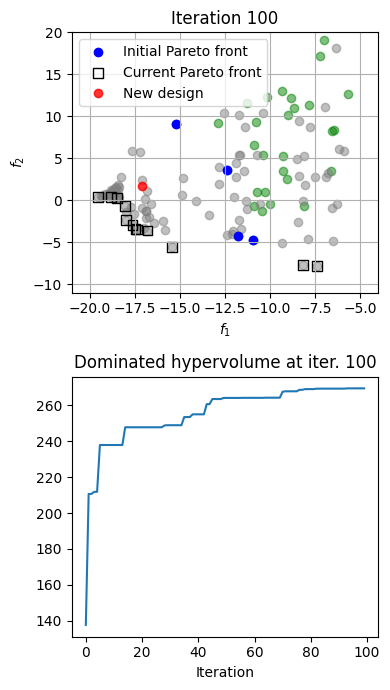

Optimization completed ...


In [5]:
# Import initial sampling plan. We are using a sampling plan located in the data directory to enable reproducibility of results.
X_train_dic = scipy.io.loadmat('data/two_objective_Kursawe_3_dv.mat')
X_train_lhs = X_train_dic.get('X_initial')

# Evaluate sampling plan
X_train = X_train_lhs[:, :, test_index]
n_init = X_train.shape[0]
F_train = test_function.Kursawe(X_train)
n_objectives = F_train.shape[1]  # number of objectives

# Arrays to track behaviour of optimization approach
HV_optimization = np.zeros((total_iter, 1))
NaN_flag_1 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 1
NaN_flag_2 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 2

# Normalization of inputs outside optimization loop as we know its maximum and minimum values
scaler_X = MinMaxScaler()
scaler_X.fit(X_bounds)

# Bayesian optimization loop
for iter in range(total_iter):
    #%% ############# Find Pareto front and Pareto set
    # Pareto designs: O if dominated, 1 if not dominated
    Pareto_index = Pareto_front(F_train)
    # Pareto front
    PF = F_train[Pareto_index]
    # Pareto designs
    PD = X_train[Pareto_index, :]
    ################## Sort Pareto front for multi-objective optimization code
    ################## that uses EEI approach (needed!!)
    PF = PF[PF[:, 0].argsort(), :]
    PD = X_train[Pareto_index, :]
    PD = PD[PF[:, 0].argsort(), :]
    ##################
    # Create scaler instances
    scaler_Y = MinMaxScaler()
    scaler_Y.fit(F_train)
    # Normalize PF, PD, and training data
    PFn, PDn = scaler_Y.transform(PF), scaler_X.transform(PD)
    F_train_n, X_train_n = scaler_Y.transform(F_train), scaler_X.transform(X_train)

    # Record initial Pareto front and Pareto set
    if iter == 0:
        # Pareto designs
        PF_init = PF
        PD_init = PD
    # Transform initial design according to current transformation
    PDn_init = scaler_X.transform(PD_init)
    PFn_init = scaler_Y.transform(PF_init)

    #%% ############## GP models
    # Training data for GPR models
    f1_train, f2_train = np.hsplit(F_train_n, n_objectives)

    # Build GPR models
    m1 = build_GPR_model(X_train_n, f1_train)
    m2 = build_GPR_model(X_train_n, f2_train)

    # Train GPR model 1
    m1, NaN_flag_1 = train_gp_model(m1, X_train_n, f1_train, NaN_flag_1, iter)

    # Train GPR model 2
    m2, NaN_flag_2 = train_gp_model(m2, X_train_n, f2_train, NaN_flag_2, iter)

    # GPR models
    GPR_models = [m1, m2]
    
    #%% ############## Optimization of acquisition function to find a new design for sampling
    # Transformation of variables to enforce box constraints
    lb_X = np.float64(np.zeros(n_dimensions))
    ub_X = np.float64(np.ones(n_dimensions))
    Sigmoid_X = tfp.bijectors.Sigmoid(low=lb_X, high=ub_X)
    scaling_opt = 1
    x_new = find_new_design_EEI(GPR_models, EEI, X_train_n, PFn, eff_length, n_samples_opt, n_dimensions, learning_rate, num_steps_optimizer, Sigmoid_X, scaling_opt)

    #%% ############## Evaluate new design
    x_new_original = scaler_X.inverse_transform(x_new)
    F_new = test_function.Kursawe(x_new_original)

    #%% ############## Optimization performance metrics
    ind_0 = HV(ref_point=ref_point)
    initial_HV = ind_0(PF_init)
    ind_i = HV(ref_point=ref_point)
    HV_optimization[iter, :] = ind_i(PF)
    scaling_opt = 0
    AF_i, EEI_x_i, Prob_impr_i, YP_i, min_distance_x_i, penal_dist_x_i = EEI(x_new, GPR_models, PFn, Sigmoid_X, X_train_n, eff_length, scaling_opt) # Here scaling_opt is 0 since x_new is already scaled

    print("Iteration:", iter + 1)
    
    # #%% ############## Visualization and tracing evolution of optimization
    # Plot every 10 iterations
    if ((iter + 1) % 10 == 0) or (iter == 0):        
        print("New design:", x_new_original[0])
        print("Initial HV:", initial_HV)
        print("Current HV:", ind_i(PF))
        print("Acquisition function:", -AF_i.numpy()[0, 0])
        print("EEI:", EEI_x_i.numpy()[0, 0])
        print("PI:", Prob_impr_i.numpy()[0, 0])
        print("Similar design penalization:", penal_dist_x_i.numpy()[0, 0])

        plt.figure(figsize=(4, 7))
        ax1 = plt.subplot(211)
        ax1.grid()
        plt.scatter(F_train[:n_init, 0], F_train[:n_init, 1], c='green', alpha=0.5) # 'Initial designs'
        plt.scatter(F_train[n_init:, 0], F_train[n_init:, 1], c='gray', alpha=0.5) #'Sampled designs'
        plt.scatter(PF_init[:, 0], PF_init[:, 1], c='blue', label = 'Initial Pareto front')
        plt.scatter(PF[:, 0], PF[:, 1], marker= 's', s=50, facecolors='none', edgecolors='k', label = 'Current Pareto front')
        plt.plot(F_new[0:, 0], F_new[0:, 1], 'ro', alpha=0.8, label = 'New design')
        ax1.set_xlabel('$f_1$')
        ax1.set_ylabel('$f_2$')
        ax1.set_title('Iteration ' + str(iter + 1))
        ax1.legend(loc='upper left')
        ax1.set_xlim([-21, -4])
        ax1.set_ylim([-11, 20])

        ax2 = plt.subplot(212)
        ax2.plot(HV_optimization[:iter+1,0])
        ax2.set_xlabel('Iteration')
        ax2.title.set_text('Dominated hypervolume at iter. ' + str(iter + 1))
        plt.tight_layout()
        plt.show()

    # %% Update training data
    F_train = np.concatenate((F_train, F_new), 0)
    X_train = np.concatenate((X_train, x_new_original), 0)
print('Optimization completed ...')

**Omni test problem:** Problem with a convex Pareto front and six design variables.

Optimization settings

In [6]:
test_index = 0 # select a test index from 0 to 4 (to retrive the initial sampling plan located in the data directory).
total_iter = 200 # Total number of iterations
n_dimensions = 6 # Number of dimensions of the optimization problem
X_bounds = np.concatenate((np.zeros((1,n_dimensions)),6*np.ones((1,n_dimensions))),0) # Box constraints of the optimization problem

num_steps_optimizer = 400  # Number of iterations of SGD-based optimizer (300 - 400)
learning_rate = 0.25  # Learning rate optimizer

n_samples_opt = np.min((25 * n_dimensions, 500)) # Number of points for multi-point optimization of the EPDC
eff_length = ((0.05 ** 2) * n_dimensions) ** 0.5  # Effective lenght for penalization of similar designs
ref_point = np.array([0., 0.]) # Reference point for calculation of dominated hypervolume

Optimization loop

Iteration: 1
New design: [5.00240113 3.61924263 5.71197485 5.18532896 5.18277211 3.1535249 ]
Initial HV: 11.40399202670268
Current HV: 11.40399202670268
Acquisition function: 0.16350469
EEI: 0.16350469
PI: 0.45824724
Similar design penalization: 1.0


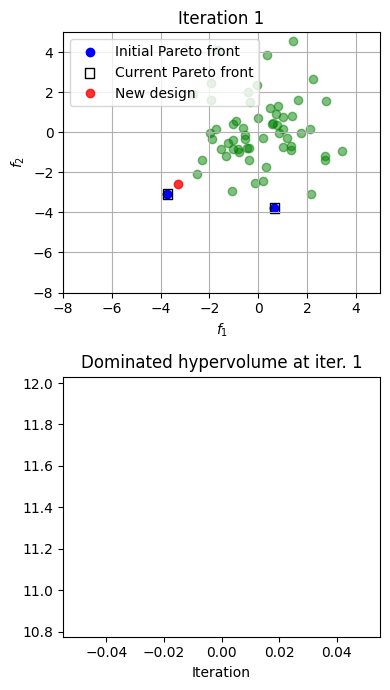

Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
New design: [1.93759619 3.61539932 1.21768681 2.8732639  5.23267579 3.40759366]
Initial HV: 11.40399202670268
Current HV: 12.550354273304702
Acquisition function: 0.18394056
EEI: 0.18399125
PI: 0.45604664
Similar design penalization: 0.9997245


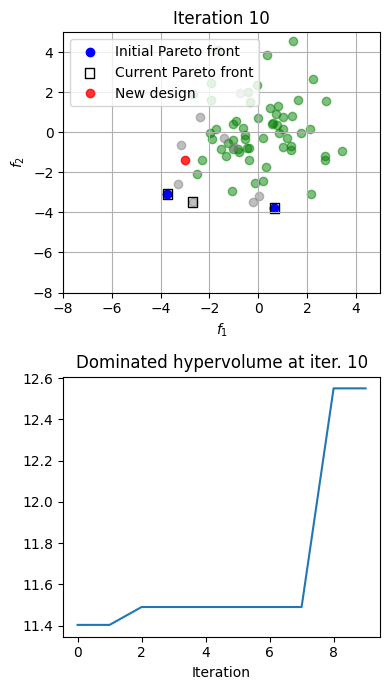

Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
New design: [2.80509306 3.85209803 1.1538755  2.80429617 4.94012195 3.97818325]
Initial HV: 11.40399202670268
Current HV: 13.177677830529122
Acquisition function: 0.06976313
EEI: 0.06991521
PI: 0.38500664
Similar design penalization: 0.9978248


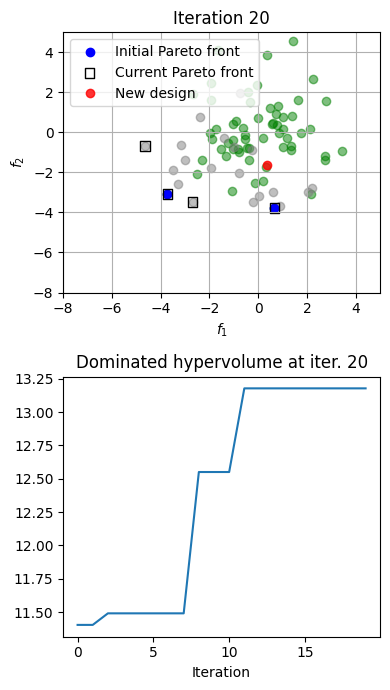

Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
New design: [4.91566998 3.28395154 1.25585102 2.88611644 5.64584595 4.79029991]
Initial HV: 11.40399202670268
Current HV: 13.224267547577004
Acquisition function: 0.110214934
EEI: 0.110214934
PI: 0.78479654
Similar design penalization: 1.0


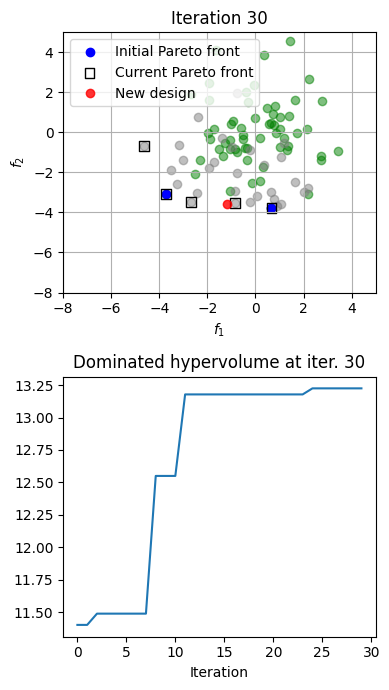

Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
New design: [2.0734281  3.96833968 1.11643145 2.69538587 4.30215869 4.77988245]
Initial HV: 11.40399202670268
Current HV: 13.770685135383216
Acquisition function: 0.10466416
EEI: 0.10467723
PI: 0.70323193
Similar design penalization: 0.9998751


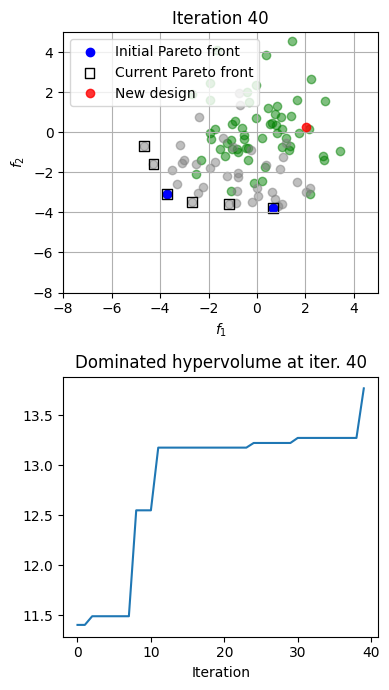

Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
New design: [5.02893767 2.98236343 1.34906979 4.54192202 5.30219705 3.48503609]
Initial HV: 11.40399202670268
Current HV: 16.889032503323275
Acquisition function: 0.090047605
EEI: 0.090133846
PI: 0.7038356
Similar design penalization: 0.99904317


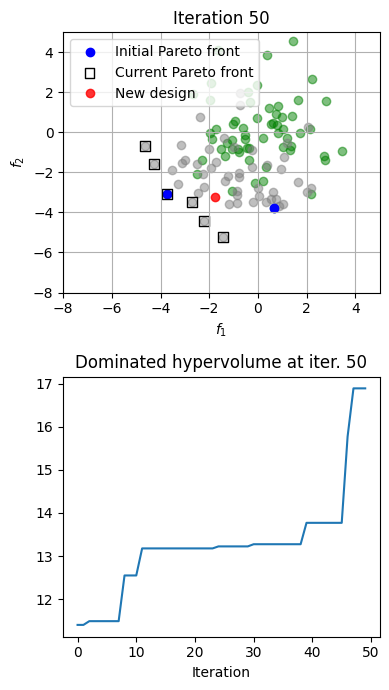

Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
New design: [5.34316515 3.55836536 0.87357633 3.65001363 5.61662103 3.36106128]
Initial HV: 11.40399202670268
Current HV: 16.889032503323275
Acquisition function: 0.070531316
EEI: 0.07202385
PI: 0.7872413
Similar design penalization: 0.97927713


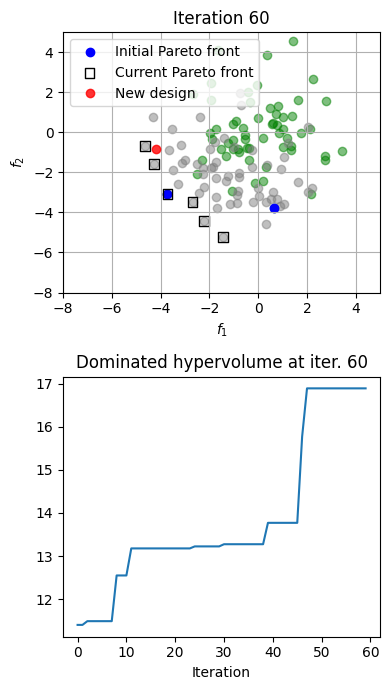

Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
New design: [5.24764703 3.30098746 1.31938544 3.79470156 5.15017919 4.85725565]
Initial HV: 11.40399202670268
Current HV: 17.47958593524153
Acquisition function: 0.07978084
EEI: 0.079784006
PI: 0.527206
Similar design penalization: 0.9999603


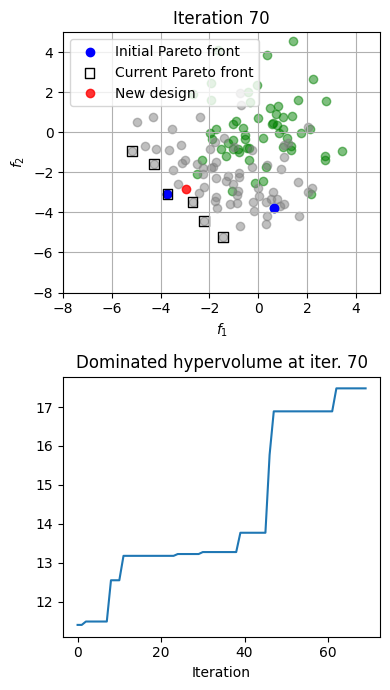

Iteration: 71
Iteration: 72
Iteration: 73
Iteration: 74
Iteration: 75
Iteration: 76
Iteration: 77
Iteration: 78
Iteration: 79
Iteration: 80
New design: [5.24829876 1.43342093 1.33039364 3.67071688 4.74584269 5.02987486]
Initial HV: 11.40399202670268
Current HV: 17.47958593524153
Acquisition function: 0.065015435
EEI: 0.066152066
PI: 0.5618681
Similar design penalization: 0.98281795


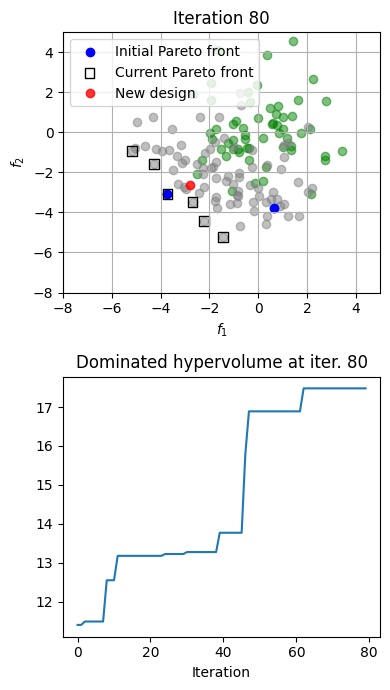

Iteration: 81
Iteration: 82
Iteration: 83
Iteration: 84
Iteration: 85
Iteration: 86
Iteration: 87
Iteration: 88
Iteration: 89
Iteration: 90
New design: [2.8568924  2.50670002 1.00530758 2.78538123 3.1712874  3.89065598]
Initial HV: 11.40399202670268
Current HV: 17.47958593524153
Acquisition function: 0.024249481
EEI: 0.024249488
PI: 0.07174245
Similar design penalization: 0.9999997


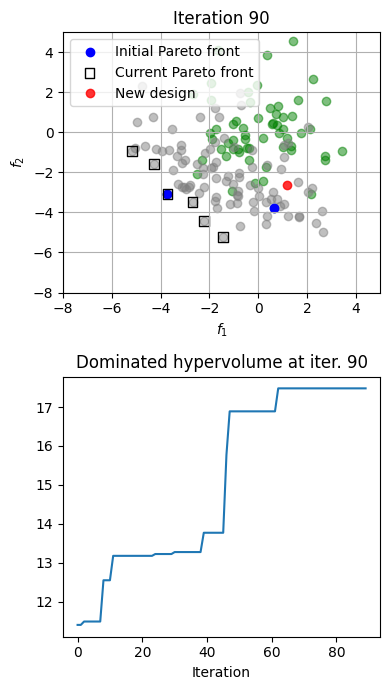

Iteration: 91
Iteration: 92
Iteration: 93
Iteration: 94
Iteration: 95
Iteration: 96
Iteration: 97
Iteration: 98
Iteration: 99
Iteration: 100
New design: [5.35831086 5.53604138 1.62802142 2.49700746 5.07052854 3.18297623]
Initial HV: 11.40399202670268
Current HV: 19.47033463098879
Acquisition function: 0.0048119924
EEI: 0.0048119924
PI: 0.039707944
Similar design penalization: 1.0


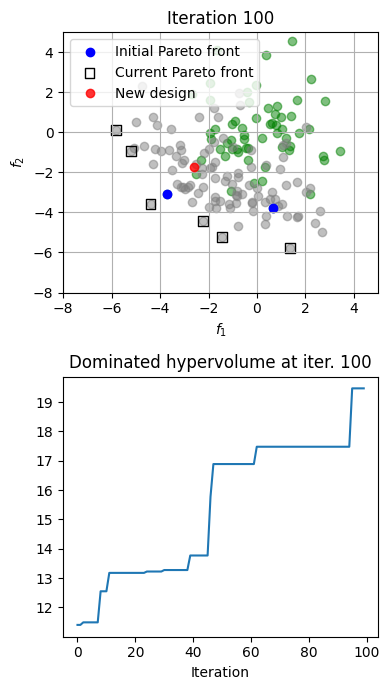

Iteration: 101
Iteration: 102
Iteration: 103
Iteration: 104
Iteration: 105
Iteration: 106
Iteration: 107
Iteration: 108
Iteration: 109
Iteration: 110
New design: [5.66941    5.3404798  1.55857814 3.73877122 4.91767002 3.60550148]
Initial HV: 11.40399202670268
Current HV: 21.379311206439894
Acquisition function: 0.003341288
EEI: 0.0033418955
PI: 0.02978053
Similar design penalization: 0.9998182


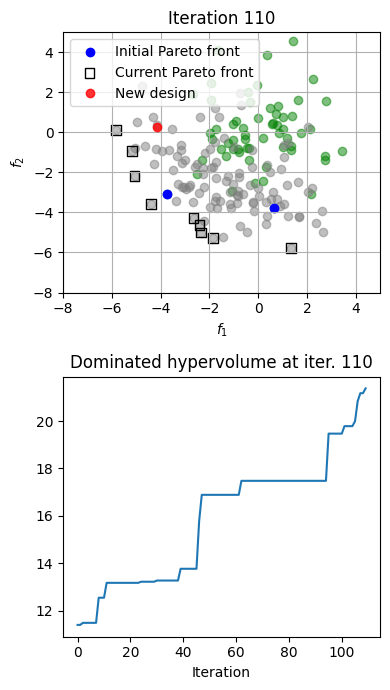

Iteration: 111
Iteration: 112
Iteration: 113
Iteration: 114
Iteration: 115
Iteration: 116
Iteration: 117
Iteration: 118
Iteration: 119
Iteration: 120
New design: [5.16765047 2.98243023 1.25836914 3.28460708 5.14813487 2.97831312]
Initial HV: 11.40399202670268
Current HV: 22.490159118847547
Acquisition function: 0.041044462
EEI: 0.058367938
PI: 0.68826735
Similar design penalization: 0.7032022


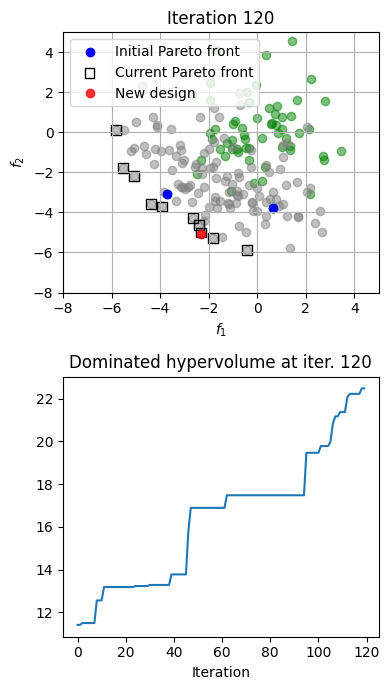

In [ ]:
# Import OmniTest from pymoo
from pymoo.problems.multi.omnitest import OmniTest
Test_function_pymoo = OmniTest(n_var = n_dimensions)

# Import initial sampling plan
X_train_dic = scipy.io.loadmat('data/two_objective_Omni_6_dv.mat')
X_train_lhs = X_train_dic.get('X_initial')

# Evaluate sampling plan
X_train = X_train_lhs[:, :, test_index]
n_init = X_train.shape[0]
F_train = Test_function_pymoo.evaluate(X_train, return_values_of=["F"])
n_objectives = F_train.shape[1]  # number of objectives

# Arrays to track behaviour of optimization approach
HV_optimization = np.zeros((total_iter, 1))
NaN_flag_1 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 1
NaN_flag_2 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 2

# Normalization of inputs outside optimization loop as we know its maximum and minimum values
scaler_X = MinMaxScaler()
scaler_X.fit(X_bounds)

# Bayesian optimization loop
for iter in range(total_iter):
    #%% ############# Find Pareto front and Pareto set
    # Pareto designs: O if dominated, 1 if not dominated
    Pareto_index = Pareto_front(F_train)
    # Pareto front
    PF = F_train[Pareto_index]
    # Pareto designs
    PD = X_train[Pareto_index, :]
    ################## Sort Pareto front for multi-objective optimization code
    ################## that uses EEI approach (needed!!)
    PF = PF[PF[:, 0].argsort(), :]
    PD = X_train[Pareto_index, :]
    PD = PD[PF[:, 0].argsort(), :]
    ##################
    # Create scaler instances
    scaler_Y = MinMaxScaler()
    scaler_Y.fit(F_train)
    # Normalize PF, PD, and training data
    PFn, PDn = scaler_Y.transform(PF), scaler_X.transform(PD)
    F_train_n, X_train_n = scaler_Y.transform(F_train), scaler_X.transform(X_train)

    # Record initial Pareto front and Pareto set
    if iter == 0:
        # Pareto designs
        PF_init = PF
        PD_init = PD
    # Transform initial design according to current transformation
    PDn_init = scaler_X.transform(PD_init)
    PFn_init = scaler_Y.transform(PF_init)

    #%% ############## GP models
    # Training data for GPR models
    f1_train, f2_train = np.hsplit(F_train_n, n_objectives)

    # Build GPR models
    m1 = build_GPR_model(X_train_n, f1_train)
    m2 = build_GPR_model(X_train_n, f2_train)

    # Train GPR model 1
    m1, NaN_flag_1 = train_gp_model(m1, X_train_n, f1_train, NaN_flag_1, iter)

    # Train GPR model 2
    m2, NaN_flag_2 = train_gp_model(m2, X_train_n, f2_train, NaN_flag_2, iter)

    # GPR models
    GPR_models = [m1, m2]
    
    #%% ############## Optimization of acquisition function to find a new design for sampling
    # Transformation of variables to enforce box constraints
    lb_X = np.float64(np.zeros(n_dimensions))
    ub_X = np.float64(np.ones(n_dimensions))
    Sigmoid_X = tfp.bijectors.Sigmoid(low=lb_X, high=ub_X)
    scaling_opt = 1
    x_new = find_new_design_EEI(GPR_models, EEI, X_train_n, PFn, eff_length, n_samples_opt, n_dimensions, learning_rate, num_steps_optimizer, Sigmoid_X, scaling_opt)

    #%% ############## Evaluate new design
    x_new_original = scaler_X.inverse_transform(x_new)
    F_new = Test_function_pymoo.evaluate(x_new_original, return_values_of=["F"])

    #%% ############## Optimization performance metrics
    ind_0 = HV(ref_point=ref_point)
    initial_HV = ind_0(PF_init)
    ind_i = HV(ref_point=ref_point)
    HV_optimization[iter, :] = ind_i(PF)
    scaling_opt = 0
    AF_i, EEI_x_i, Prob_impr_i, YP_i, min_distance_x_i, penal_dist_x_i = EEI(x_new, GPR_models, PFn, Sigmoid_X, X_train_n, eff_length, scaling_opt) # Here scaling_opt is 0 since x_new is already scaled

    print("Iteration:", iter + 1)
    
    # #%% ############## Visualization and tracing evolution of optimization
    # Plot every 10 iterations
    if ((iter + 1) % 10 == 0) or (iter == 0):        
        print("New design:", x_new_original[0])
        print("Initial HV:", initial_HV)
        print("Current HV:", ind_i(PF))
        print("Acquisition function:", -AF_i.numpy()[0, 0])
        print("EEI:", EEI_x_i.numpy()[0, 0])
        print("PI:", Prob_impr_i.numpy()[0, 0])
        print("Similar design penalization:", penal_dist_x_i.numpy()[0, 0])

        plt.figure(figsize=(4, 7))
        ax1 = plt.subplot(211)
        ax1.grid()
        plt.scatter(F_train[:n_init, 0], F_train[:n_init, 1], c='green', alpha=0.5) # 'Initial designs'
        plt.scatter(F_train[n_init:, 0], F_train[n_init:, 1], c='gray', alpha=0.5) #'Sampled designs'
        plt.scatter(PF_init[:, 0], PF_init[:, 1], c='blue', label = 'Initial Pareto front')
        plt.scatter(PF[:, 0], PF[:, 1], marker= 's', s=50, facecolors='none', edgecolors='k', label = 'Current Pareto front')
        plt.plot(F_new[0:, 0], F_new[0:, 1], 'ro', alpha=0.8, label = 'New design')
        ax1.set_xlabel('$f_1$')
        ax1.set_ylabel('$f_2$')
        ax1.set_title('Iteration ' + str(iter + 1))
        ax1.legend(loc='upper left')
        ax1.set_xlim([-8, 5])
        ax1.set_ylim([-8, 5])

        ax2 = plt.subplot(212)
        ax2.plot(HV_optimization[:iter+1,0])
        ax2.set_xlabel('Iteration')
        ax2.title.set_text('Dominated hypervolume at iter. ' + str(iter + 1))
        plt.tight_layout()
        plt.show()

    # %% Update training data
    F_train = np.concatenate((F_train, F_new), 0)
    X_train = np.concatenate((X_train, x_new_original), 0)
print('Optimization completed ...')

**ZDT3:** Problem with a segmented Pareto front and six design variables.

Optimization settings

In [ ]:
test_index = 0 # select a test index from 0 to 4 (to retrive the initial sampling plan located in the data directory).
total_iter = 200 # Total number of iterations
n_dimensions = 6 # Number of dimensions of the optimization problem
X_bounds = np.concatenate((np.zeros((1,n_dimensions)),np.ones((1,n_dimensions))),0) # Box constraints of the optimization problem

num_steps_optimizer = 400  # Number of iterations of SGD-based optimizer (300 - 400)
learning_rate = 0.25  # Learning rate optimizer

n_samples_opt = np.min((25 * n_dimensions, 500)) # Number of points for multi-point optimization of the EPDC
eff_length = ((0.05 ** 2) * n_dimensions) ** 0.5  # Effective lenght for penalization of similar designs
ref_point = np.array([1., 7.]) # Reference point for calculation of dominated hypervolume

Optimization loop

In [ ]:
# Import initial sampling plan. We are using a sampling plan located in the data directory to enable reproducibility of results.
X_train_dic = scipy.io.loadmat('data/two_objective_ZDT3_6_dv.mat')
X_train_lhs = X_train_dic.get('X_initial')

# Evaluate sampling plan
X_train = X_train_lhs[:, :, test_index]
n_init = X_train.shape[0]
F_train = test_function.ZDT3(X_train, n_dimensions)
n_objectives = F_train.shape[1]  # number of objectives

# Arrays to track behaviour of optimization approach
HV_optimization = np.zeros((total_iter, 1))
NaN_flag_1 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 1
NaN_flag_2 = np.zeros(total_iter) # Flag to check if NaN values are found in the hyperparemters of GPR model 2

# Normalization of inputs outside optimization loop as we know its maximum and minimum values
scaler_X = MinMaxScaler()
scaler_X.fit(X_bounds)

# Bayesian optimization loop
for iter in range(total_iter):
    #%% ############# Find Pareto front and Pareto set
    # Pareto designs: O if dominated, 1 if not dominated
    Pareto_index = Pareto_front(F_train)
    # Pareto front
    PF = F_train[Pareto_index]
    # Pareto designs
    PD = X_train[Pareto_index, :]
    ################## Sort Pareto front for multi-objective optimization code
    ################## that uses EEI approach (needed!!)
    PF = PF[PF[:, 0].argsort(), :]
    PD = X_train[Pareto_index, :]
    PD = PD[PF[:, 0].argsort(), :]
    ##################
    # Create scaler instances
    scaler_Y = MinMaxScaler()
    scaler_Y.fit(F_train)
    # Normalize PF, PD, and training data
    PFn, PDn = scaler_Y.transform(PF), scaler_X.transform(PD)
    F_train_n, X_train_n = scaler_Y.transform(F_train), scaler_X.transform(X_train)

    # Record initial Pareto front and Pareto set
    if iter == 0:
        # Pareto designs
        PF_init = PF
        PD_init = PD
    # Transform initial design according to current transformation
    PDn_init = scaler_X.transform(PD_init)
    PFn_init = scaler_Y.transform(PF_init)

    #%% ############## GP models
    # Training data for GPR models
    f1_train, f2_train = np.hsplit(F_train_n, n_objectives)

    # Build GPR models
    m1 = build_GPR_model(X_train_n, f1_train)
    m2 = build_GPR_model(X_train_n, f2_train)

    # Train GPR model 1
    m1, NaN_flag_1 = train_gp_model(m1, X_train_n, f1_train, NaN_flag_1, iter)

    # Train GPR model 2
    m2, NaN_flag_2 = train_gp_model(m2, X_train_n, f2_train, NaN_flag_2, iter)

    # GPR models
    GPR_models = [m1, m2]
    
    #%% ############## Optimization of acquisition function to find a new design for sampling
    # Transformation of variables to enforce box constraints
    lb_X = np.float64(np.zeros(n_dimensions))
    ub_X = np.float64(np.ones(n_dimensions))
    Sigmoid_X = tfp.bijectors.Sigmoid(low=lb_X, high=ub_X)
    scaling_opt = 1
    x_new = find_new_design_EEI(GPR_models, EEI, X_train_n, PFn, eff_length, n_samples_opt, n_dimensions, learning_rate, num_steps_optimizer, Sigmoid_X, scaling_opt)

    #%% ############## Evaluate new design
    x_new_original = scaler_X.inverse_transform(x_new)
    F_new = test_function.ZDT3(x_new_original, n_dimensions)

    #%% ############## Optimization performance metrics
    ind_0 = HV(ref_point=ref_point)
    initial_HV = ind_0(PF_init)
    ind_i = HV(ref_point=ref_point)
    HV_optimization[iter, :] = ind_i(PF)
    scaling_opt = 0
    AF_i, EEI_x_i, Prob_impr_i, YP_i, min_distance_x_i, penal_dist_x_i = EEI(x_new, GPR_models, PFn, Sigmoid_X, X_train_n, eff_length, scaling_opt) # Here scaling_opt is 0 since x_new is already scaled

    print("Iteration:", iter + 1)
    
    # #%% ############## Visualization and tracing evolution of optimization
    # Plot every 10 iterations
    if ((iter + 1) % 10 == 0) or (iter == 0):        
        print("New design:", x_new_original[0])
        print("Initial HV:", initial_HV)
        print("Current HV:", ind_i(PF))
        print("Acquisition function:", -AF_i.numpy()[0, 0])
        print("EEI:", EEI_x_i.numpy()[0, 0])
        print("PI:", Prob_impr_i.numpy()[0, 0])
        print("Similar design penalization:", penal_dist_x_i.numpy()[0, 0])

        plt.figure(figsize=(4, 7))
        ax1 = plt.subplot(211)
        ax1.grid()
        plt.scatter(F_train[:n_init, 0], F_train[:n_init, 1], c='green', alpha=0.5) # 'Initial designs'
        plt.scatter(F_train[n_init:, 0], F_train[n_init:, 1], c='gray', alpha=0.5) #'Sampled designs'
        plt.scatter(PF_init[:, 0], PF_init[:, 1], c='blue', label = 'Initial Pareto front')
        plt.scatter(PF[:, 0], PF[:, 1], marker= 's', s=50, facecolors='none', edgecolors='k', label = 'Current Pareto front')
        plt.plot(F_new[0:, 0], F_new[0:, 1], 'ro', alpha=0.8, label = 'New design')
        ax1.set_xlabel('$f_1$')
        ax1.set_ylabel('$f_2$')
        ax1.set_title('Iteration ' + str(iter + 1))
        ax1.legend(loc='upper left')
        ax1.set_xlim([-0.05, 1.05])
        ax1.set_ylim([-2, 8])

        ax2 = plt.subplot(212)
        ax2.plot(HV_optimization[:iter+1,0])
        ax2.set_xlabel('Iteration')
        ax2.title.set_text('Dominated hypervolume at iter. ' + str(iter + 1))
        plt.tight_layout()
        plt.show()

    # %% Update training data
    F_train = np.concatenate((F_train, F_new), 0)
    X_train = np.concatenate((X_train, x_new_original), 0)
print('Optimization completed ...')